In [1]:
import torch
from torch.utils.data import DataLoader
import torch.nn as nn
from torchvision import datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import tqdm
import time
import numpy as np
import IPython.display as ipd
from model.resnet import resnet152, resnet34

from utils.dataloader import CaptchaDataset

# hyperparameter

In [3]:
EPOCHS = 1
BATCH_SIZE = 1
CUDA = torch.cuda.is_available()
DEVICE = 'cuda' if CUDA else 'cpu'

# dataloader

In [12]:
image_transform = transforms.Compose([
    transforms.Resize([64, 64]),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

dataset = CaptchaDataset('./Large_Captcha_Dataset', transform=image_transform)

In [13]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

In [14]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=True)

# model

In [7]:
model = resnet34()

In [8]:
if CUDA:
    model = model.cuda()

# train

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)

In [10]:
loss_history = []

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1/1, 1497.60 sec/epoch
current loss=18.7240


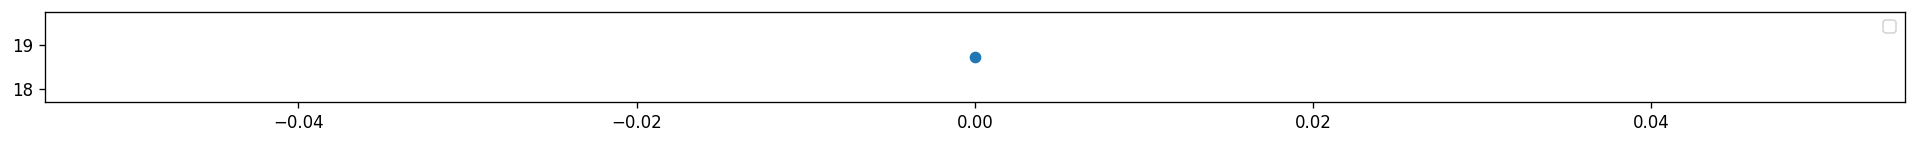

In [15]:
for e in range(EPOCHS):
    start_time = time.time()
    current_loss = []
    for (x, y) in tqdm(train_dataloader):
        optimizer.zero_grad()
        x = x.to(DEVICE)
        y = y.to(DEVICE)
        
        y1, y2, y3, y4, y5 = y[:, 0], y[:, 1], y[:, 2], y[:, 3], y[:, 4]
        
        pred1, pred2, pred3, pred4, pred5 = model(x)

        loss1 = criterion(pred1, y1)
        loss2 = criterion(pred2, y2)
        loss3 = criterion(pred3, y3)
        loss4 = criterion(pred4, y4)
        loss5 = criterion(pred5, y5)
        loss = loss1 + loss2 + loss3 + loss4 + loss5
        current_loss.append(loss.item())
        loss.backward()
        optimizer.step()
        
    current_loss = np.mean(current_loss).item()
    loss_history.append(current_loss)
    
    ipd.clear_output(wait=True)
    print(f"{e+1}/{EPOCHS}, {time.time()-start_time:.2f} sec/epoch")
    print(f"current loss={current_loss:.4f}")
    plt.figure(figsize=(20,1),dpi=120)
    plt.scatter(np.arange(len(loss_history)), loss_history)
    plt.legend(loc=1)
    plt.show()